## Package
- install.packages('rpart') - Cria uma arvore de decisões
- install.packages('forecast') - Usamos para avaliar a metric do modelo criado

In [10]:
library(forecast)
library(rpart)

dim(iris)
summary(iris)
head(iris)

[1] 150   5

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### Abaixo, queremo prever valores de Sepal.Length. O que deve ser previsto
### vem sempre antes do ~. O que torna essa uma arvore de regressão, é a
### variavel prevista ser NUMÉRICA!

In [11]:
modelo = rpart(Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width
+ Species, data = iris)
modelo
summary(modelo)

n= 150 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 150 102.1683000 5.843333  
   2) Petal.Length< 4.25 73  13.1391800 5.179452  
     4) Petal.Length< 3.4 53   6.1083020 5.005660  
       8) Sepal.Width< 3.25 20   1.0855000 4.735000 *
       9) Sepal.Width>=3.25 33   2.6696970 5.169697 *
     5) Petal.Length>=3.4 20   1.1880000 5.640000 *
   3) Petal.Length>=4.25 77  26.3527300 6.472727  
     6) Petal.Length< 6.05 68  13.4923500 6.326471  
      12) Petal.Length< 5.15 43   8.2576740 6.165116  
        24) Sepal.Width< 3.05 33   5.2218180 6.054545 *
        25) Sepal.Width>=3.05 10   1.3010000 6.530000 *
      13) Petal.Length>=5.15 25   2.1896000 6.604000 *
     7) Petal.Length>=6.05 9   0.4155556 7.577778 *

Call:
rpart(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width + 
    Species, data = iris)
  n= 150 

          CP nsplit rel error    xerror       xstd
1 0.61346237      0 1.0000000 1.0103598 0.09841656
2 0.12180701      1 0.3865376 0.3919526 0.04790791
3 0.05718872      2 0.2647306 0.2934773 0.03096593
4 0.02980452      3 0.2075419 0.2439849 0.02960651
5 0.02303165      4 0.1777374 0.2332114 0.02866655
6 0.01698037      5 0.1547057 0.2258201 0.02627012
7 0.01000000      6 0.1377254 0.2117186 0.02546075

Variable importance
Petal.Length  Petal.Width      Species  Sepal.Width 
          37           27           22           15 

Node number 1: 150 observations,    complexity param=0.6134624
  mean=5.843333, MSE=0.6811222 
  left son=2 (73 obs) right son=3 (77 obs)
  Primary splits:
      Petal.Length < 4.25 to the left,  improve=0.61346240, (0 missing)
      Petal.Width  < 1.15 to the left,  improve=0.58031680, (0 missing)
      Species      splits as  LRR,      improv

## text( )
- Inclui o nome dos atributos no gráfico!

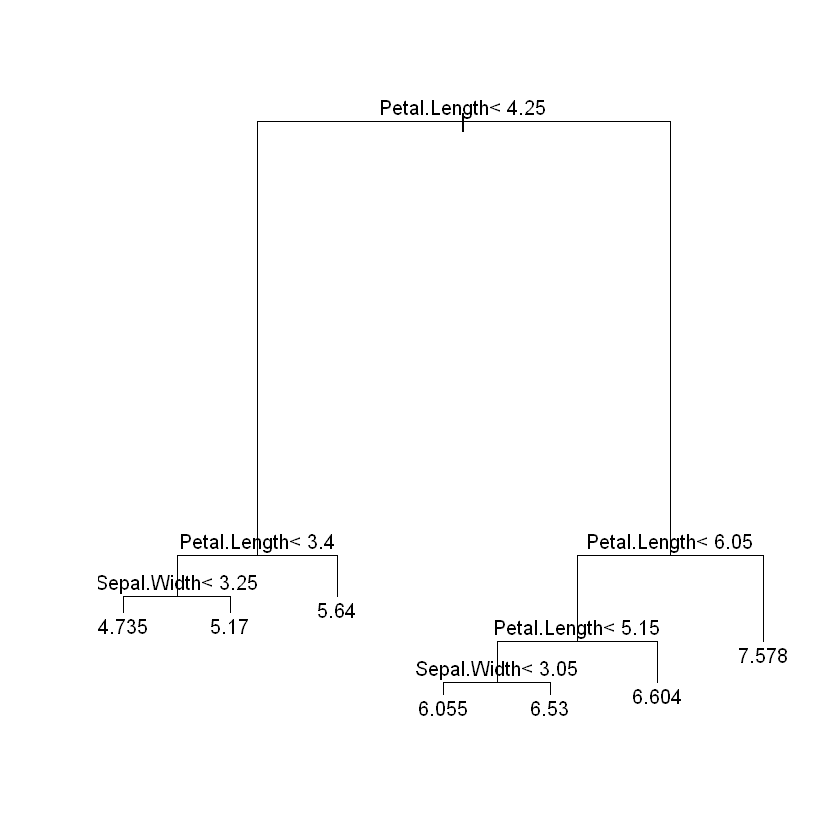

In [12]:
plot(modelo)
text(modelo)

### Com um modelo linear criado, podemos utiliza-lo com outros dados.
### Ele não utilizará mais os dados usados para contrui-lo.

In [14]:
predicao = predict(modelo, iris)
head(predicao)
summary(predicao)

1        2        3        4        5        6 
5.169697 4.735000 4.735000 4.735000 5.169697 5.169697

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.735   5.170   6.055   5.843   6.530   7.578 

## cbind( )
- Cria colunas par uma matrix
- A ideia é compararmos os valores previstos com os reais

In [15]:
compara = cbind(predicao, iris$Sepal.Length, predicao - iris$Sepal.Length)
head(compara)

,predicao,,
1,5.169697,5.1,0.06969697
2,4.735000,4.9,-0.16500000
3,4.735000,4.7,0.03500000
4,4.735000,4.6,0.13500000
5,5.169697,5.0,0.16969697
6,5.169697,5.4,-0.23030303


## accuracy( )
- Retorna métricas estatisticas para avaliarmos as previsões.
- Basta indicar as previsões e os valores reais

In [16]:
accuracy(predicao, iris$Sepal.Length)

,ME,RMSE,MAE,MPE,MAPE
Test set,6.335601e-16,0.3062806,0.2425701,-0.2838496,4.219833
